# Microéconomie 5
# TD1 : Répartition optimale des ressources

### Exercice 1 : Préférences Cobb-Douglas

Les dotations de l'économie sont $\omega_1 = 40$ et $\omega_2 = 30$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= (x_1^A)^\alpha(x_2^A)^\beta \\
    U^B(x^B) &= x_1^B \, x_2^B
\end{aligned}
    
où $\alpha, \beta > 0$.

On commence par définir les données du problème, puis on trace la carte d'indifférence des agents $A$ (en bleu, on utilise $\alpha = \frac{1}{4}$ et $\beta = \frac{3}{4}$) et $B$ (en orange).

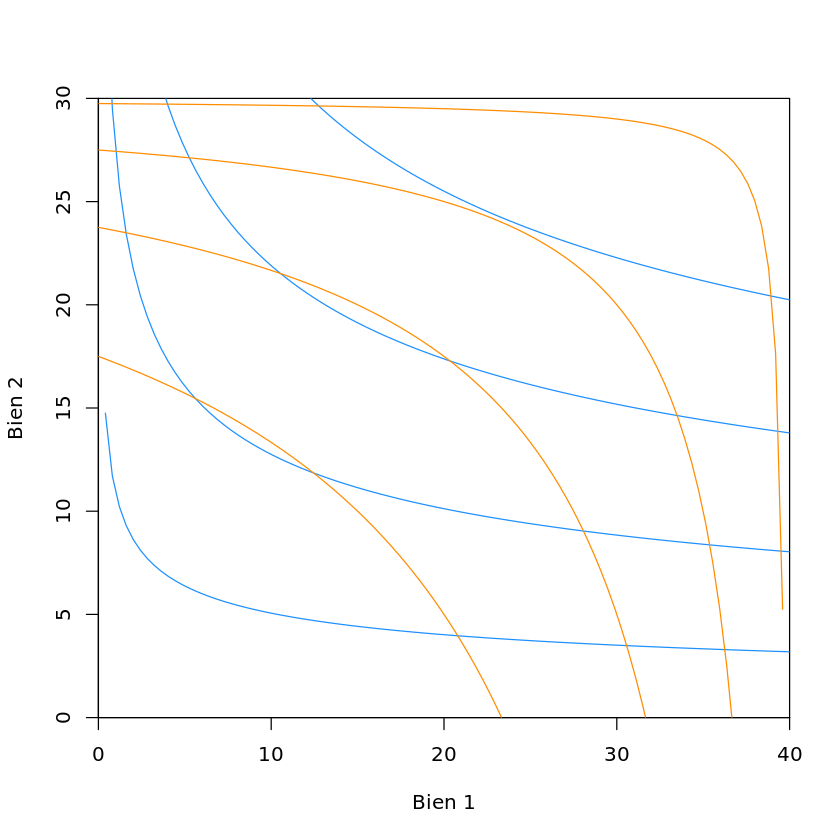

In [1]:
omega1 <- 40                                 # dotation totale en bien 1
omega2 <- 30                                 # dotation totale en bien 2
alpha <- 1/4                                 # importance relative du bien 1 pour A
beta <- 3/4                                  # importance relative du bien 2 pour A
UA <- function(x1, x2) x1^alpha * x2^beta    # fonction d'utilité de A
UB <- function(x1, x2) x1 * x2               # fonction d'utilité de B

x1 <- seq(0,omega1, len=100)

indiffA <- function(U) { (U/x1^alpha)^(1/beta) }
indiffB <- function(U) { U/x1 }

niveauxA <- c(6, 12, 18, 24)
niveauxB <- c(10, 100, 250, 500)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2), type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))

On cherche ensuite la courbe des optima : pour cela, on résout le programme

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k \geq 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

Le lagrangien associé à ce problème est

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2) = (x_1^A)^\alpha(x_2^A)^\beta + \lambda (x_1^B \, x_2^B - \underline U^B) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

On en déduit les conditions du premier ordre par rapport aux sept variables $x_1^A$, $x_2^A$, $x_1^B$, $x_2^B$, $\lambda$, $\mu_1$, et $\mu_2$,

\begin{aligned}
    &\alpha (x_1^A)^{\alpha-1} (x_2^A)^\beta - \mu_1 = 0 \\
    &\beta (x_1^A)^\alpha (x_2^A)^{\beta-1} - \mu_2 = 0 \\
    &\lambda x_2^B - \mu_1 = 0 \\
    &\lambda x_1^B - \mu_2 = 0 \\
    &U^B(x^B) = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

En combinant adéquatement ces équations on obtient

\begin{equation}
    \frac{\alpha}{\beta} \frac{x_2^A}{x_1^A} = \frac{\mu_1}{\mu_2} = \frac{x_2^B}{x_1^B} = \frac{\omega_2 - x_2^A}{\omega_1 - x_1^A}
\end{equation}

et finalement on peut obtenir les $x_2^A$ optimaux en fonction de $x_1^A$ :

\begin{equation}
    x_2^A = \frac{\beta \omega_2 x_1^A}{\alpha(\omega_1 - x_1^A) + \beta x_1^A} \overset{\text{A.N.}}{=} \frac{45 x_1^A}{20 + x_1^A}.
\end{equation}

On représente cette courbe des optima avec quelques courbes d'indifférence tangentes.

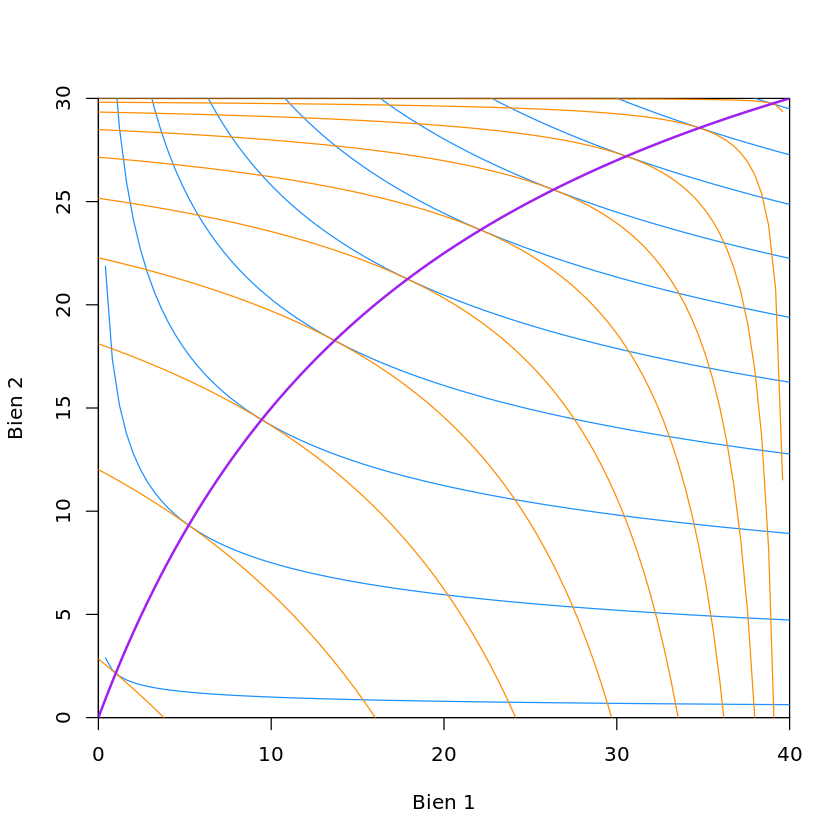

In [2]:
optima <- function(x) omega2*beta*x/(alpha*omega1 + (beta - alpha)*x)

allocA1 <- seq(1, 39, len=10)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2), type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
for (i in 1:length(allocA1)) {
    xA1 <- allocA1[i]
    xA2 <- optima(allocA1[i])
    #points(xA1, xA2)
    #range <- ((xA1-5)/step):((xA1+7)/step)
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, omega2))
    lines(x1, rev(omega2 - indiffB(UB(omega1 - xA1, omega2 - xA2))), col = "darkorange", ylim = c(0, omega2))
}
lines(x1, optima(x1), col = "purple", lwd = 2)

On s'intéresse enfin aux allocations acceptées dans la négociation. En on représente les allocations acceptées par $A$, en en celles acceptées par $B$. Les allocations acceptées à la fois par $A$ et $B$ sont donc celles en .

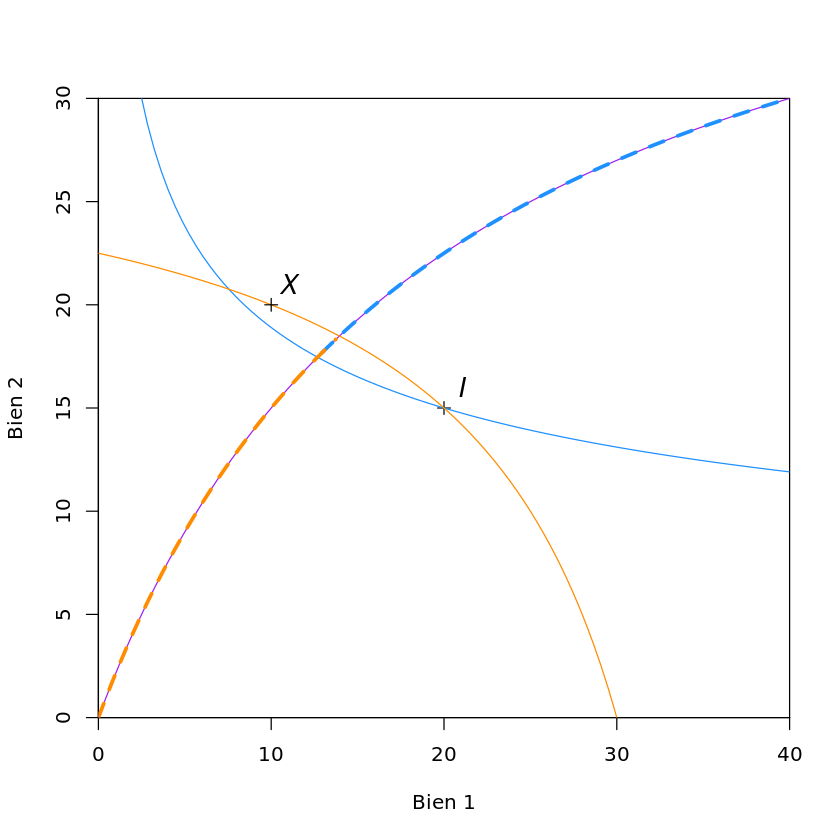

In [17]:
I <- c(20, 15)

# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2), type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)
text(I[1]+1, I[2]+1, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))
lines(x1, optima(x1), col = "purple", lwd = 1)
rangeA <- (length(x1)/3):length(x1)
lines(x1[rangeA], optima(x1)[rangeA], col = "dodgerblue", lwd = 3, lty = 2)

# Allocations acceptées par B

lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2))
rangeB <- 1:length(x1)/2.8
lines(x1[rangeB], optima(x1)[rangeB], col = "darkorange", lwd = 3, lty = 2)

# Allocation X

X <- c(10, 20)

points(X[1], X[2], pch = 3)
text(X[1]+1, X[2]+1, labels = "X", cex = 1.3, font = 3)




On remarque notamment que l'allocation $X$ n'est acceptée par aucun des deux agents car elle n'est pas optimale.